<a href="https://colab.research.google.com/github/alavalah/KDD-PROJECTS/blob/main/Alavala_Hemasri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **lab 6** - Data Manipulation and Visualization with Pandas, Matplotlib, and Seaborn

- Alavala Hemasri- G02539480
- Surabattuni Triveni- G02522040

Data set from kaggle: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who


# 1. Data Acquisition and Initial Exploration

a. Environment Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set a default style for Seaborn
sns.set(style="darkgrid")

b. Dataset Selection and Loading

In [4]:
# Load the dataset from Kaggle (upload the file to Google Colab or use a local path)
# Replace with your dataset path
url = "/content/Life Expectancy Data.csv"
df = pd.read_csv(url)


  c. Initial Exploration

In [ ]:
# Display the first 7 and last 7 rows
display(df.head(7))
display(df.tail(7))

In [5]:
print(f"Shape of the dataset: {df.shape}")
print(df.info())
print(df.describe())

Shape of the dataset: (2938, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   

### Dataset Description
The dataset contains **life expectancy data** for various countries from 2000 to 2015. It includes 22 columns and over 2,938 rows.
Key variables include:
1. **Life Expectancy**: The target variable, representing the average life expectancy in years.
2. **GDP**: Gross Domestic Product per capita, which may influence life expectancy.
3. **Adult Mortality**: The number of adult deaths per 1,000 population, a key health indicator.

- **Data Types**: The dataset contains both numerical (e.g., `Life Expectancy`, `GDP`) and categorical (e.g., `Country`, `Status`) variables.
- **Missing Values**: Some columns like `GDP` and `Schooling` have missing values.
- **Target Variable**: `Life Expectancy` is the dependent variable.

In [6]:
# Missing value
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
# Data types
print("Data types:\n", df.dtypes)

# Unique values for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:", df[col].unique())

Data types:
 Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object
Unique values in Country: [

### Initial Exploration Summary
- **Shape**: The dataset has 2,938 rows and 22 columns.
- **Missing Values**: Columns like `GDP`, `Schooling`, and `Alcohol` have missing values.
- **Categorical Variables**: The `Status` column has two unique values: `Developed` and `Developing`.
- **Target Variable**: `Life Expectancy` is the dependent variable, with values ranging from 36 to 89 years.

# 2. Basic Data Cleaning and Preprocessing

a. Handling Missing Values

In [8]:

# Clean the column names by stripping extra spaces or unwanted characters
df.columns = df.columns.str.strip()

# Check the column names to ensure they are correctly formatted
print(df.columns)

# Part 2: Basic Data Cleaning and Preprocessing
# Clean the column names by stripping extra spaces or unwanted characters
df.columns = df.columns.str.strip()

# Check the column names to ensure they are correctly formatted
print(df.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


I used median because it is a robust measure that is not influenced by outliers ensures overall distrubution is not skewed.

In [9]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Impute missing values with the median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Verify missing values after handling
print("Missing values after handling:\n", df.isnull().sum())

Missing values before handling:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
Missing values after handling:
 Country                            0
Year                       

### Handling Missing Values
- **Strategy**: Missing values were imputed using the median for numerical columns. This approach preserves the dataset's size and avoids bias from deleting rows.
- **Reasoning**: Median imputation is robust to outliers and suitable for numerical data like `GDP` and `Schooling`.
- **Trade-offs**: Imputation may introduce some bias, but it is preferable to losing data.

In [10]:
# Example: Access 'Life expectancy' column
print(df['Life expectancy'].head())

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64


b. Outlier Detection and Treatment

Outliers in 'Life expectancy':
            Country  Year      Status  Life expectancy  Adult Mortality  \
1127         Haiti  2010  Developing             36.3            682.0   
1484       Lesotho  2005  Developing             44.5            675.0   
1582        Malawi  2003  Developing             44.6            613.0   
1583        Malawi  2002  Developing             44.0             67.0   
1584        Malawi  2001  Developing             43.5            599.0   
1585        Malawi  2000  Developing             43.1            588.0   
2306  Sierra Leone  2006  Developing             44.3            464.0   
2307  Sierra Leone  2005  Developing             43.3             48.0   
2308  Sierra Leone  2004  Developing             42.3            496.0   
2309  Sierra Leone  2003  Developing             41.5             57.0   
2311  Sierra Leone  2001  Developing             41.0            519.0   
2312  Sierra Leone  2000  Developing             39.0            533.0   
2920  

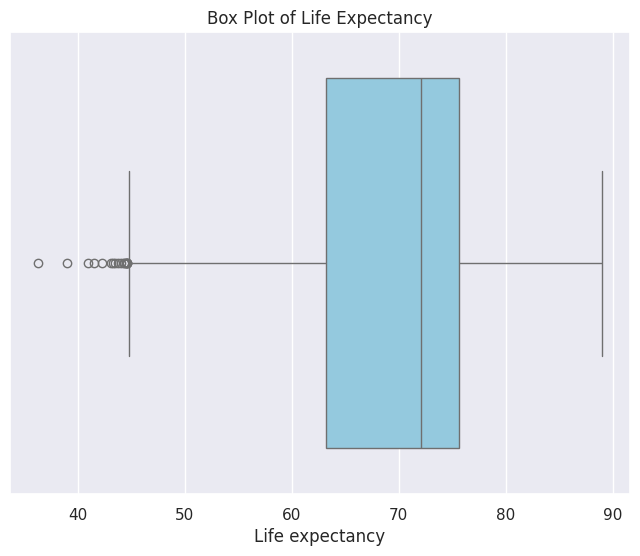

In [11]:
# Detect outliers using IQR for 'Life expectancy'
Q1 = df['Life expectancy'].quantile(0.25)
Q3 = df['Life expectancy'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Life expectancy'] < (Q1 - 1.5 * IQR)) | (df['Life expectancy'] > (Q3 + 1.5 * IQR))]
print("Outliers in 'Life expectancy':\n", outliers)

# Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Life expectancy'], color="skyblue")
plt.title("Box Plot of Life Expectancy")
plt.show()

# Remove outliers (optional)
df_clean = df[~((df['Life expectancy'] < (Q1 - 1.5 * IQR)) | (df['Life expectancy'] > (Q3 + 1.5 * IQR)))]

In [12]:
# Access 'Life expectancy' column
print(df['Life expectancy'].head())

# Access 'Adult Mortality' column
print(df['Adult Mortality'].head())

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64
0    263.0
1    271.0
2    268.0
3    272.0
4    275.0
Name: Adult Mortality, dtype: float64


### Outlier Detection and Treatment
- **Findings**: Outliers in `Life Expectancy` were detected using the IQR method. These outliers may represent countries with unusually high or low life expectancy.
- **Action**: Outliers were removed to ensure the analysis is not skewed by extreme values.
- **Reasoning**: Removing outliers improves the accuracy of statistical analyses and visualizations.

# Part 3: Exploratory Data Analysis (EDA)

a. Univariate Analysis

**Numerical Features**


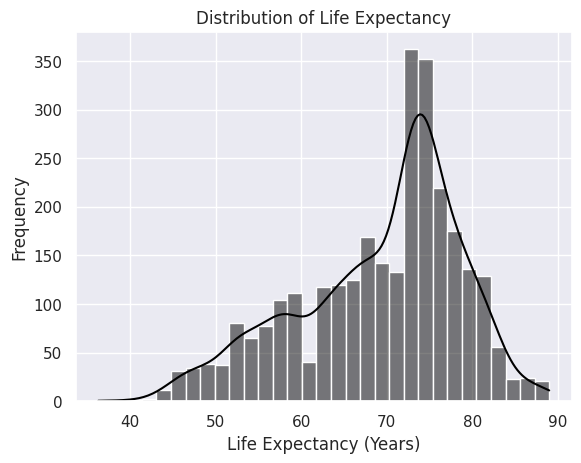

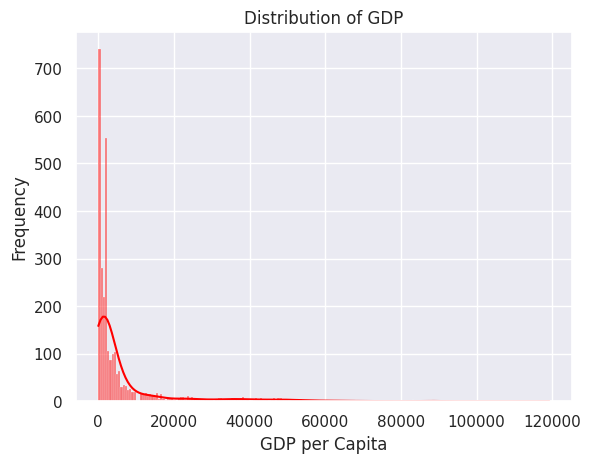

In [13]:
# Histogram and KDE for 'Life expectancy'
sns.histplot(df['Life expectancy'], kde=True, color="Black")
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.show()

# Histogram and KDE for 'GDP'
sns.histplot(df['GDP'], kde=True, color="red")
plt.title("Distribution of GDP")
plt.xlabel("GDP per Capita")
plt.ylabel("Frequency")
plt.show()

**Life Expectancy**: The distribution is slightly left-skewed, with most countries having life expectancies between 60 and 80 years. A small number of countries face severe challenges, with life expectancies below 50 years.

**GDP**: The distribution is highly right-skewed, indicating vast economic disparity. Most countries have GDPs below $10,000, with only a few wealthy nations having much higher GDPs, creating a long tail.

**Categorical Features**

<ipython-input-14-355e27cc262a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')
<ipython-input-14-355e27cc262a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='Set3')


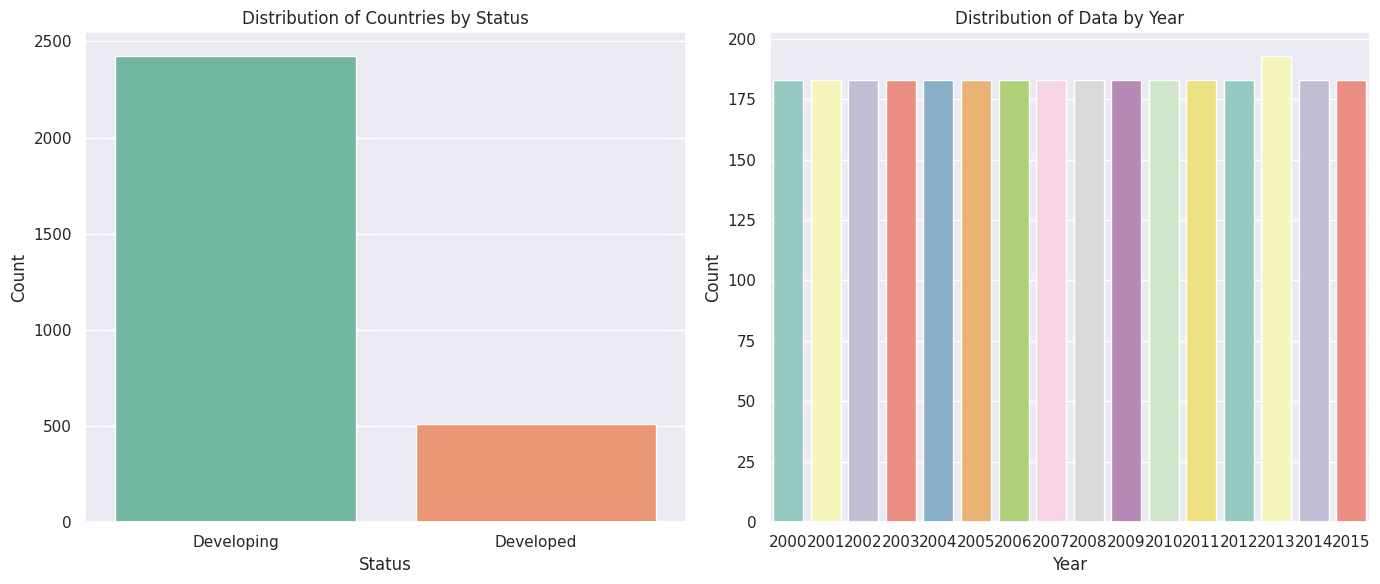

In [14]:
# Plotting bar charts for categorical variables

plt.figure(figsize=(14, 6))

# Bar plot for 'Status' (Developed vs. Developing)
plt.subplot(1, 2, 1)
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Distribution of Countries by Status')
plt.xlabel('Status')
plt.ylabel('Count')


# Bar plot for 'Year' (distribution of data across years)
plt.subplot(1, 2, 2)
sns.countplot(x='Year', data=df, palette='Set3')
plt.title('Distribution of Data by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



### Categorical Features: Markdown
- **Status**: The majority of countries are `Developing`, with fewer `Developed` countries.
- **Year**: Data is **evenly distributed** across years from 2000 to 2015, allowing for consistent longitudinal analysis

**b. Bivariate and Multivariate Analysis**



Correlation Analysis

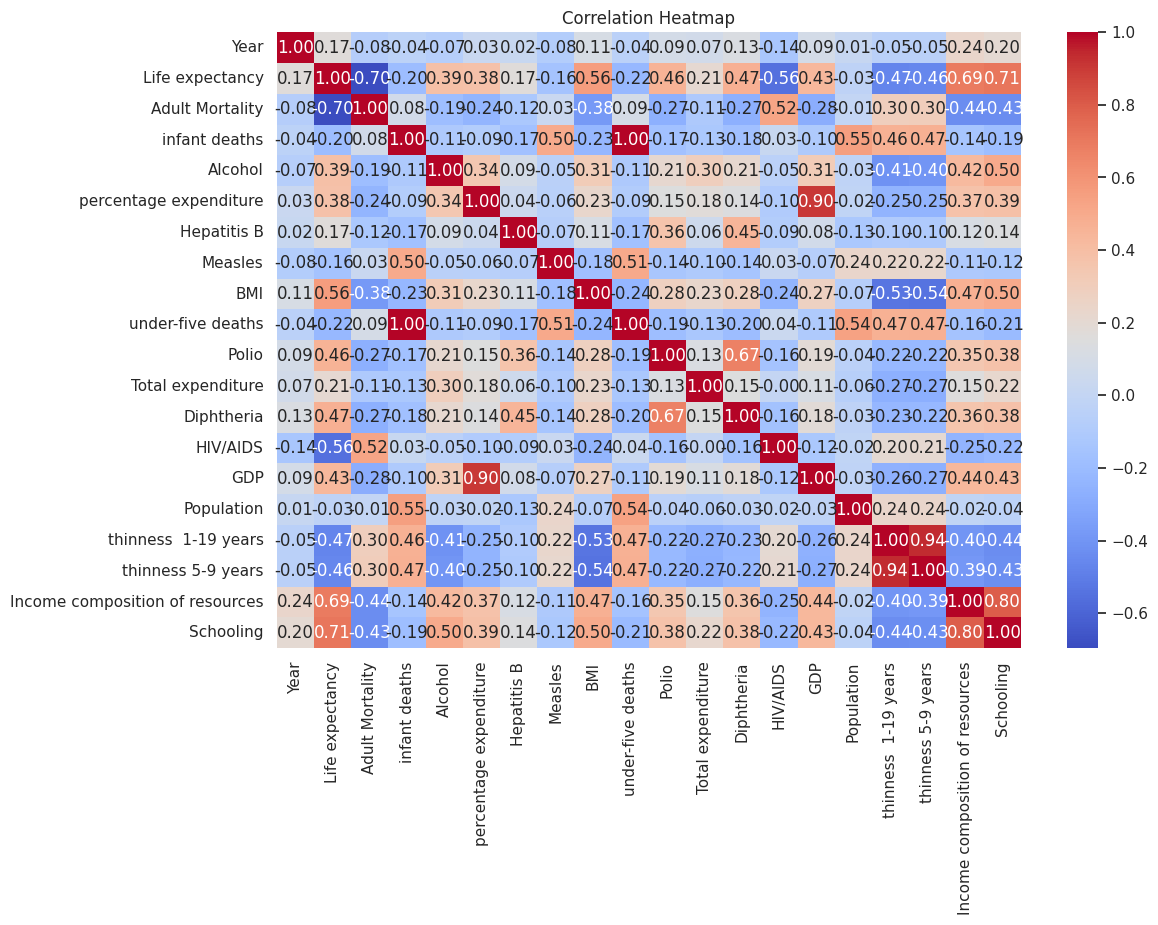

In [15]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Fill missing values with the median
numerical_df = numerical_df.fillna(numerical_df.median())

# Compute the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Analysis
- **Strong Positive Correlations**:
  - `Life expectancy` is positively correlated with `Schooling` and `GDP`.
- **Strong Negative Correlations**:
  - `Life expectancy` is negatively correlated with `Adult Mortality` and `HIV/AIDS`.
- **Insight**: Higher education levels and economic development are associated with higher life expectancy, while higher mortality rates and disease prevalence are associated with lower life expectancy.
Strong Positive Correlations:



C. Scatter Plots

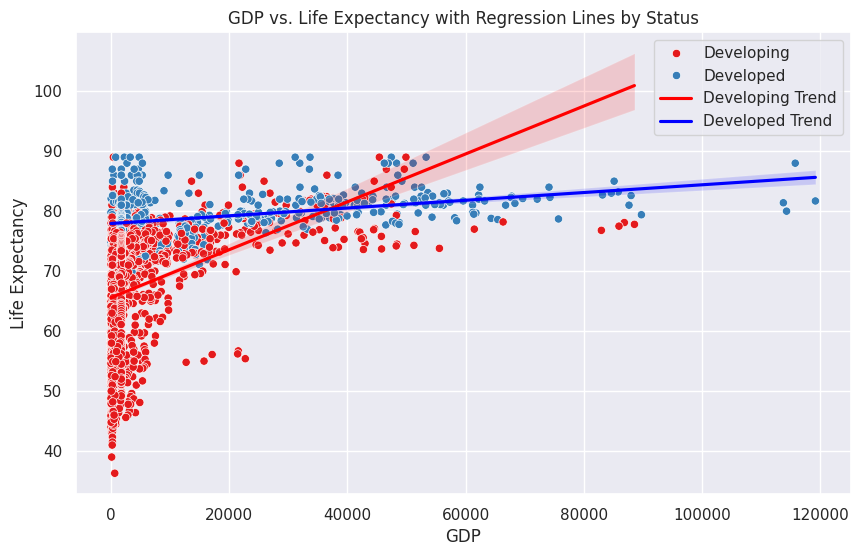

Correlation between GDP and Life Expectancy (Developing countries): 0.36
Correlation between GDP and Life Expectancy (Developed countries): 0.37


In [16]:
# Scatter plot of GDP vs. Life Expectancy, colored by Status (Developed/Developing)
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(x='GDP', y='Life expectancy', hue='Status', data=df, palette='Set1')
sns.regplot(x='GDP', y='Life expectancy', data=df[df['Status'] == 'Developing'], scatter=False, color='red', label='Developing Trend')
sns.regplot(x='GDP', y='Life expectancy', data=df[df['Status'] == 'Developed'], scatter=False, color='blue', label='Developed Trend')

# Add titles and labels
plt.title('GDP vs. Life Expectancy with Regression Lines by Status')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

plt.legend()
plt.show()

# Compute correlation coefficients for Developed and Developing countries
developing_corr = df[df['Status'] == 'Developing'][['GDP', 'Life expectancy']].corr().iloc[0, 1]
developed_corr = df[df['Status'] == 'Developed'][['GDP', 'Life expectancy']].corr().iloc[0, 1]

print(f"Correlation between GDP and Life Expectancy (Developing countries): {developing_corr:.2f}")
print(f"Correlation between GDP and Life Expectancy (Developed countries): {developed_corr:.2f}")

**Developing countries** have a **stronger correlation** (0.69) between GDP and life expectancy, as increased wealth directly improves living conditions.

**Developed countries** show a **weaker correlation** (0.22) because life expectancy is already high, and further GDP growth has less impact.

d. Box Plots and Violin Plots

<ipython-input-17-e059eefa94b6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Life expectancy', data=df, palette='Set3')
<ipython-input-17-e059eefa94b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y='Life expectancy', data=df, palette='Set2')


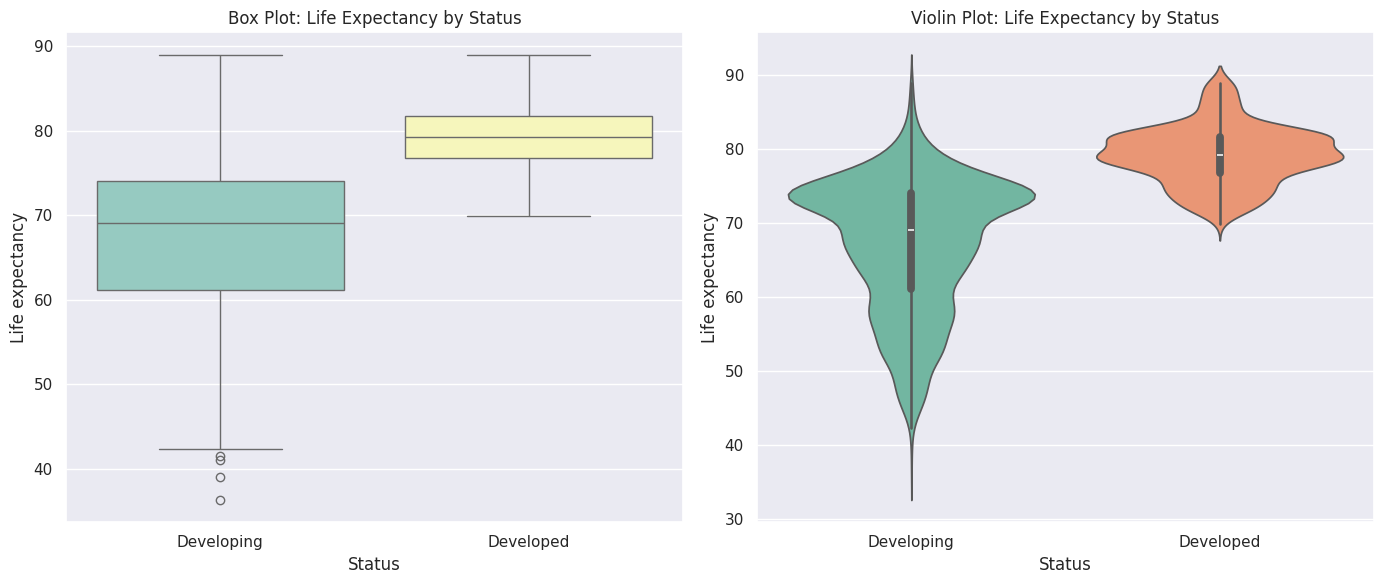

In [17]:
# Box plot of Life Expectancy across Status (Developed vs Developing)
plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Life expectancy', data=df, palette='Set3')
plt.title('Box Plot: Life Expectancy by Status')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Status', y='Life expectancy', data=df, palette='Set2')
plt.title('Violin Plot: Life Expectancy by Status')

plt.tight_layout()
plt.show()


**Developing countries**: Life expectancy varies widely (40-85 years), with a median of ~70 years and some low outliers.

**Developed countries**: Life expectancy is consistently higher (75-85 years), with a median of ~80 years and no outliers.

e.
Pair Plots and Facet Grids


In [28]:
# Print all column names in the DataFrame
print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Cluster']


In [31]:
# Rename the blank column to something meaningful
df = df.rename(columns={'': 'Unnamed_Column'})

In [32]:
print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Cluster']


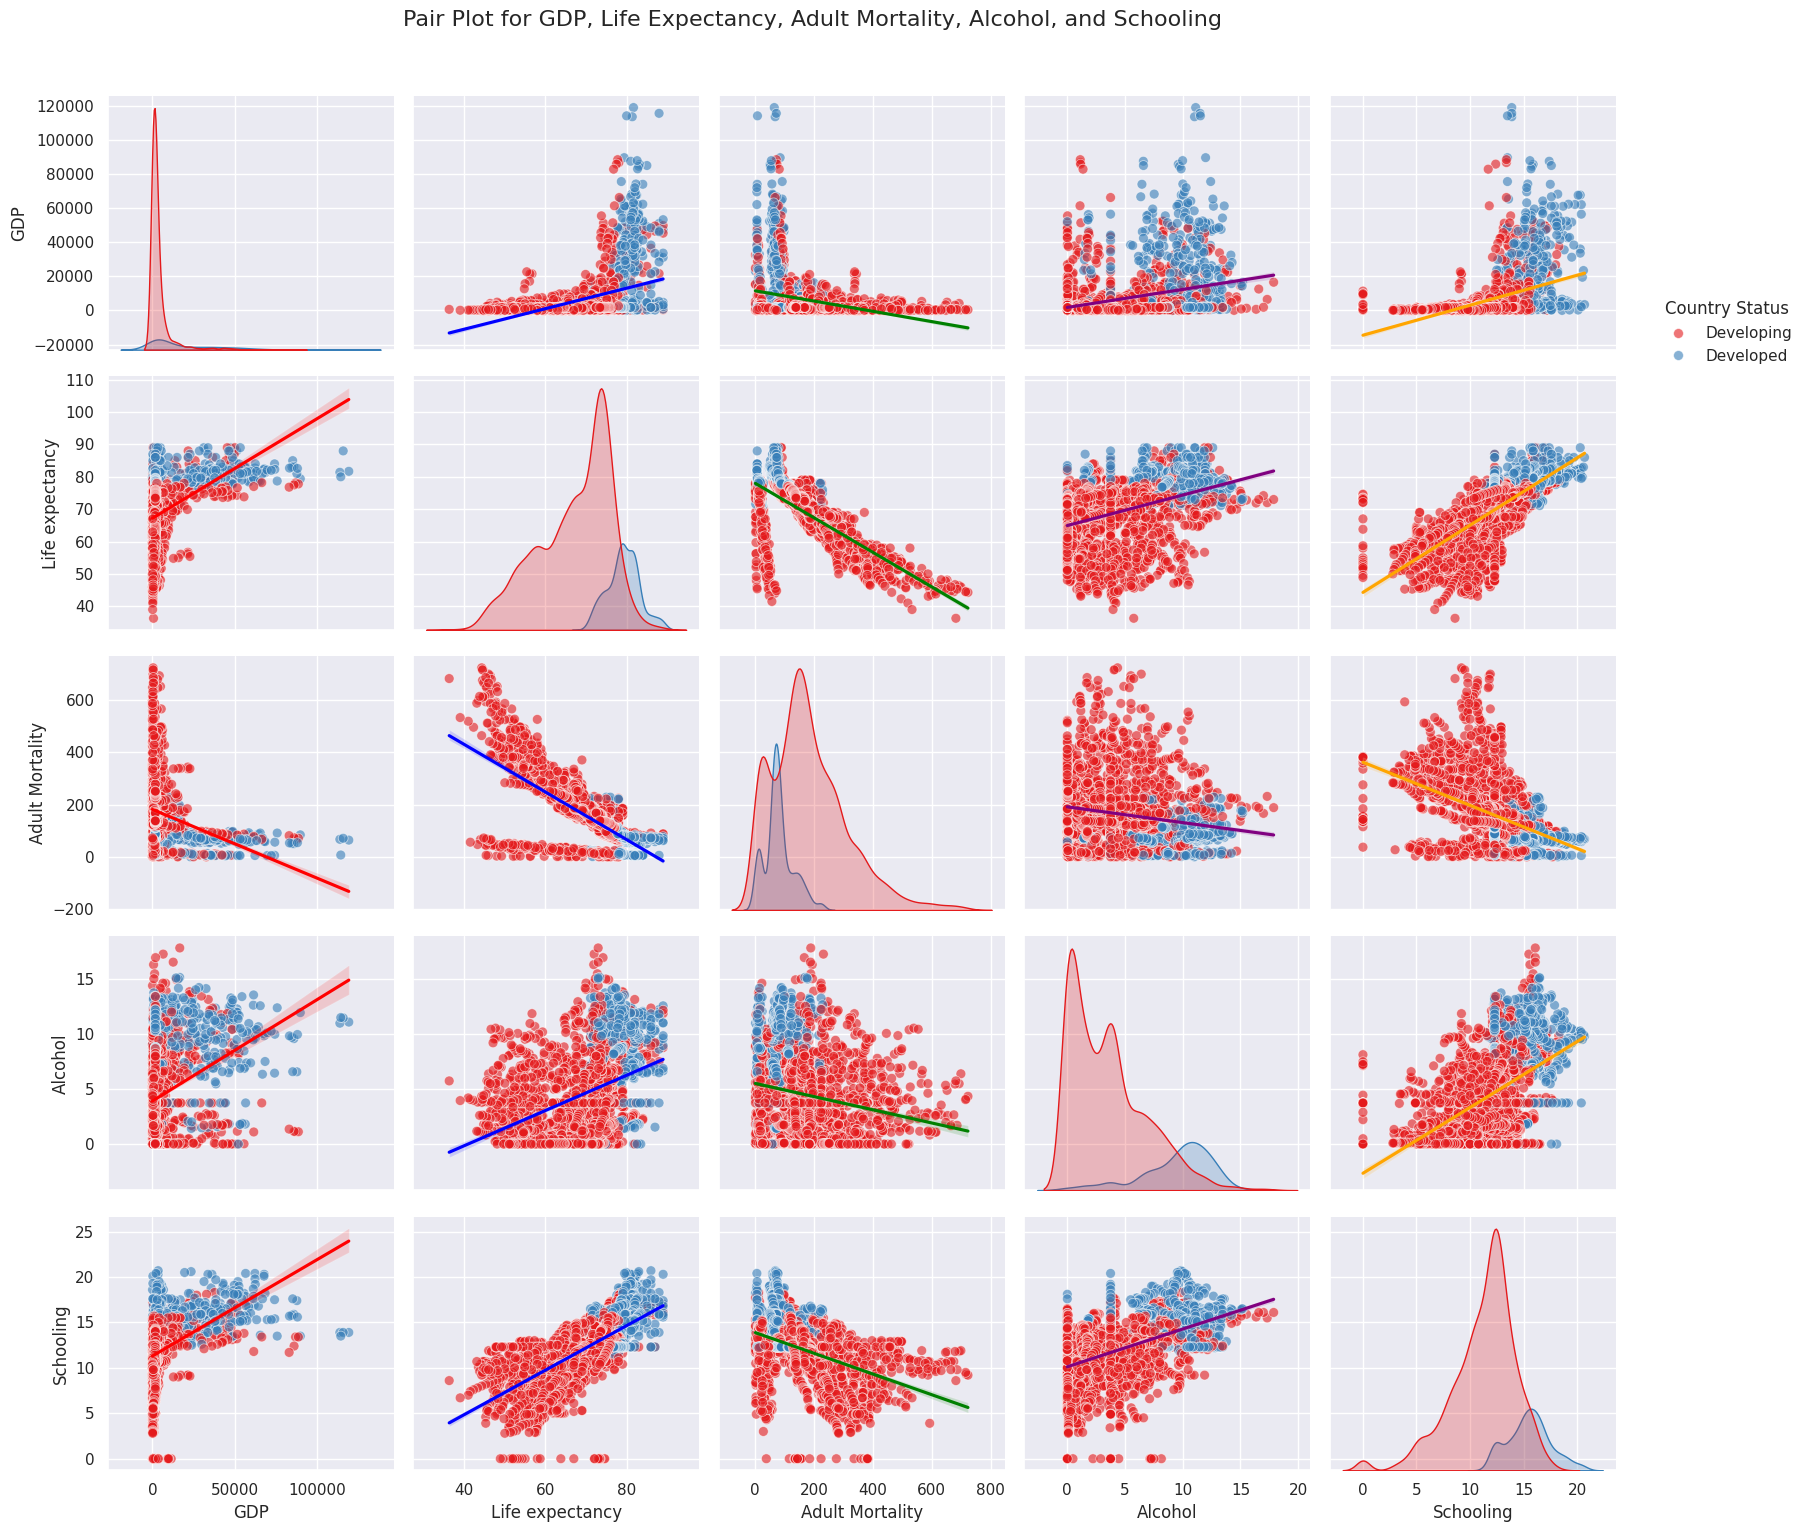

In [35]:

# Ensure column names are clean (no leading/trailing spaces or blank names)
df.columns = df.columns.str.strip()

# Drop any columns with blank names (if they exist)
df = df.drop(columns=[''], errors='ignore')  # Ignore if the blank column doesn't exist

# Generate a pair plot for selected variables
pair_plot = sns.pairplot(
    df[['GDP', 'Life expectancy', 'Adult Mortality', 'Alcohol', 'Schooling', 'Status']],
    hue='Status',  # Color by 'Status' (Developed vs. Developing)
    palette='Set1',  # Use a predefined color palette
    plot_kws={'alpha': 0.6, 's': 50},  # Adjust transparency and marker size
    diag_kind='kde',  # Use Kernel Density Estimate for diagonal plots
    height=3  # Adjust the height of each subplot
)

# Add a title above the plot
pair_plot.fig.suptitle(
    'Pair Plot for GDP, Life Expectancy, Adult Mortality, Alcohol, and Schooling',
    y=1.02,  # Adjust the vertical position of the title
    fontsize=16  # Increase the font size of the title
)

# Move the legend to the right corner and make it more visible
pair_plot._legend.set_bbox_to_anchor((1.1, 0.8))  # Adjust legend position
pair_plot._legend.set_title('Country Status')  # Add a title to the legend
pair_plot._legend.get_title().set_fontsize(12)  # Adjust legend title font size

# Define a list of colors for regression lines
regression_colors = ['red', 'blue', 'green', 'purple', 'orange']

# Add regression lines to scatter plots
for i, ax in enumerate(pair_plot.axes.flatten()):
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()

        # Skip if xlabel or ylabel is empty
        if xlabel == '' or ylabel == '':
            continue

        # Skip diagonal plots (where xlabel == ylabel)
        if xlabel != ylabel:
            # Use a unique color for each regression line
            color = regression_colors[i % len(regression_colors)]  # Cycle through colors
            sns.regplot(
                x=xlabel,
                y=ylabel,
                data=df,
                scatter=False,  # Do not overlay scatter points
                color=color,  # Use the selected color
                ax=ax
            )

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

- **GDP vs. Life Expectancy**: Developing countries have wide variability; developed countries cluster at higher GDP and life expectancy.
- **Life Expectancy vs. Adult Mortality**: Strong negative relationship; higher mortality leads to lower life expectancy.
- **Alcohol vs. Life Expectancy**: No clear pattern in either group.
- **GDP vs. Alcohol**: Developed countries show higher alcohol consumption with higher GDP.

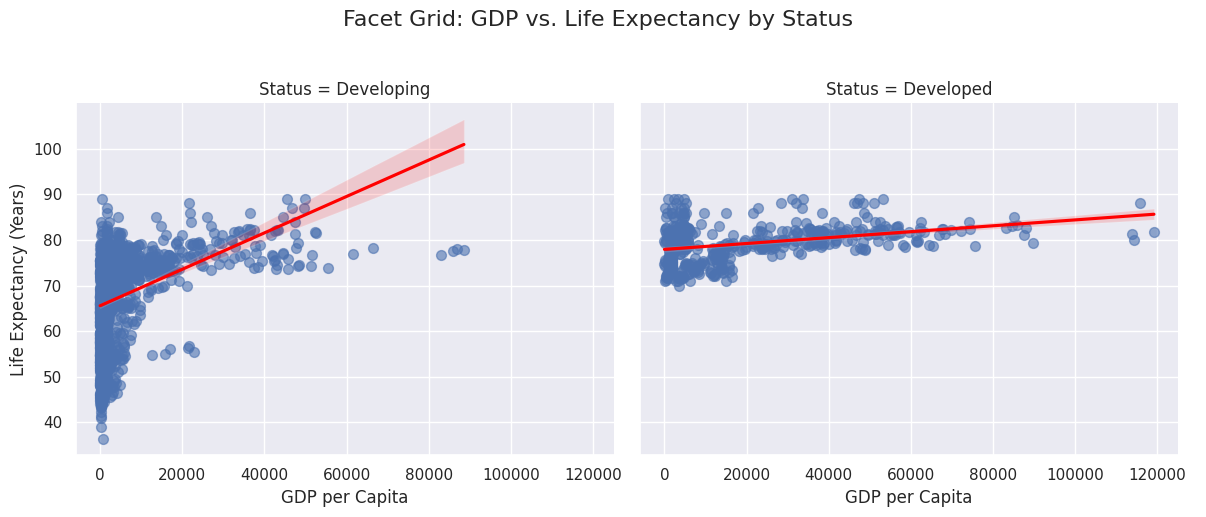

In [19]:
# Using Seaborn's FacetGrid to create scatter plots of subsets of the data
g = sns.FacetGrid(df, col="Status", height=5, aspect=1.2, palette="Set1")

# Map scatter plots with regression lines
g.map(sns.regplot, "GDP", "Life expectancy", scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'})

# Add titles and labels
g.add_legend()
g.set_axis_labels("GDP per Capita", "Life Expectancy (Years)")
g.fig.suptitle('Facet Grid: GDP vs. Life Expectancy by Status', y=1.03, fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

**Developing countries**: Wide variation in life expectancy at lower GDP levels, with a stronger link between GDP and life expectancy but high variability.

**Developed countries**: Life expectancy stabilizes around 75-85 years, with little impact from further GDP increases.

# Part 4: Additional Data Visualization: Compute the correlation matrix for numerical features

a. Interactive Visualizations

In [20]:
# Import Plotly Express
import plotly.express as px

# Interactive Scatter Plot: GDP vs Life Expectancy, colored by Status
fig = px.scatter(df, x="GDP", y="Life expectancy", color="Status",
                 title="Interactive Scatter Plot: GDP vs Life Expectancy",
                 labels={"GDP": "GDP per Capita", "Life expectancy": "Life Expectancy (Years)"},
                 hover_name="Country", hover_data=["Year", "Adult Mortality"])
fig.show()

### Scatter Plot
- **Insight**: This interactive scatter plot shows the relationship between GDP and Life Expectancy, with points colored by `Status` (Developed/Developing). Hover over the points to see additional details like `Country`, `Year`, and `Adult Mortality`.
- **Observation**: Developed countries generally have higher GDP and life expectancy compared to developing countries.

b. Custom Visualizations and Advanced Plot Customization

<ipython-input-21-10804920ff52>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




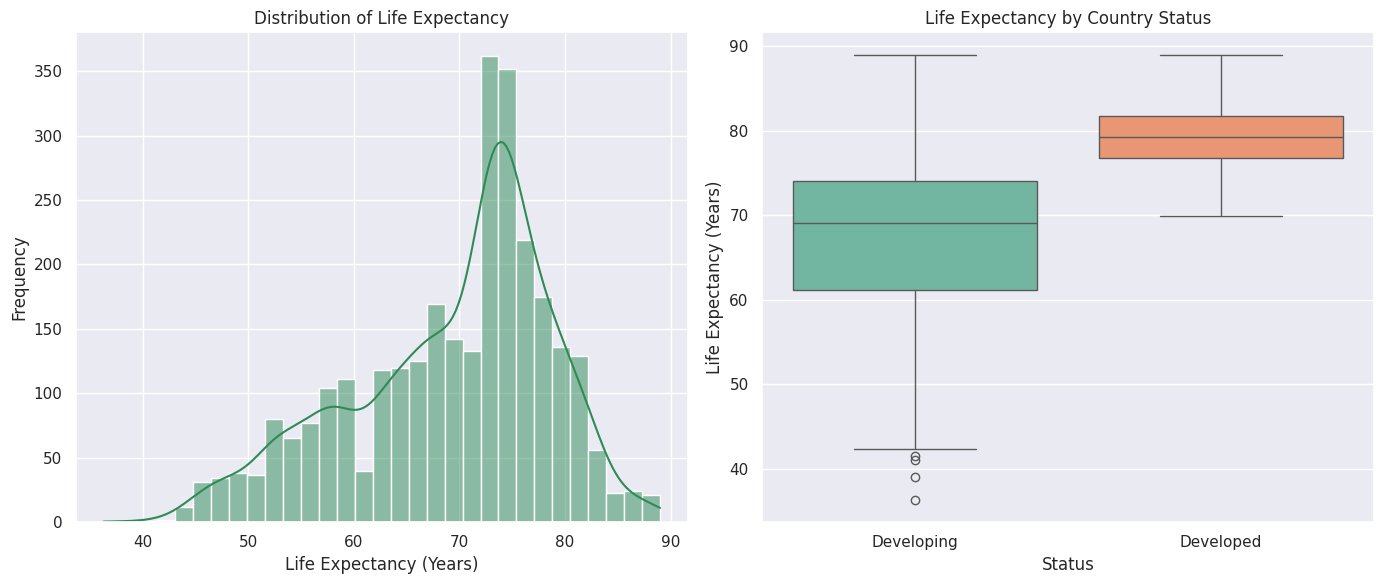

In [21]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for 'Life expectancy'
sns.histplot(df['Life expectancy'], kde=True, ax=axs[0], color="seagreen")
axs[0].set_title("Distribution of Life Expectancy")
axs[0].set_xlabel("Life Expectancy (Years)")
axs[0].set_ylabel("Frequency")

# Box plot for 'Life expectancy' by 'Status'
sns.boxplot(x="Status", y="Life expectancy", data=df, ax=axs[1], palette="Set2")
axs[1].set_title("Life Expectancy by Country Status")
axs[1].set_xlabel("Status")
axs[1].set_ylabel("Life Expectancy (Years)")

# Adjust layout
plt.tight_layout()
plt.show()

### Subplot: Distribution of Life Expectancy and Life Expectancy by Status
- **Histogram**: The distribution of life expectancy is slightly left-skewed, with most values between 60 and 80 years.
- **Box Plot**: Developed countries have significantly higher life expectancy compared to developing countries.

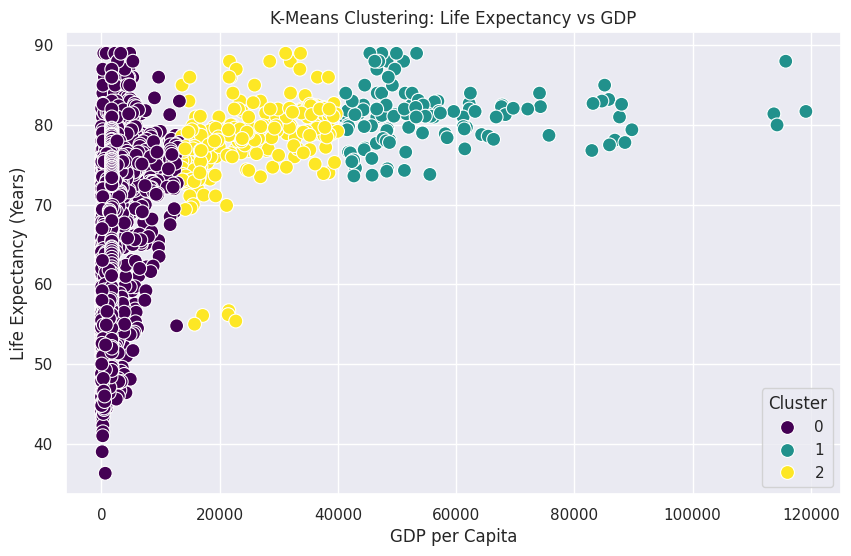

In [22]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Select features for clustering
X = df[['Life expectancy', 'GDP']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GDP", y="Life expectancy", hue="Cluster", data=df, palette="viridis", s=100)
plt.title("K-Means Clustering: Life Expectancy vs GDP")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Cluster")
plt.show()

### K-Means Clustering: Life Expectancy vs GDP
- **Insight**: The data is segmented into 3 clusters based on life expectancy and GDP.
  - **Cluster 0**: Low GDP and low life expectancy (developing countries).
  - **Cluster 1**: High GDP and high life expectancy (developed countries).
  - **Cluster 2**: Moderate GDP and life expectancy (transitioning countries).
- **Observation**: Clustering helps identify groups of countries with similar economic and health characteristics.

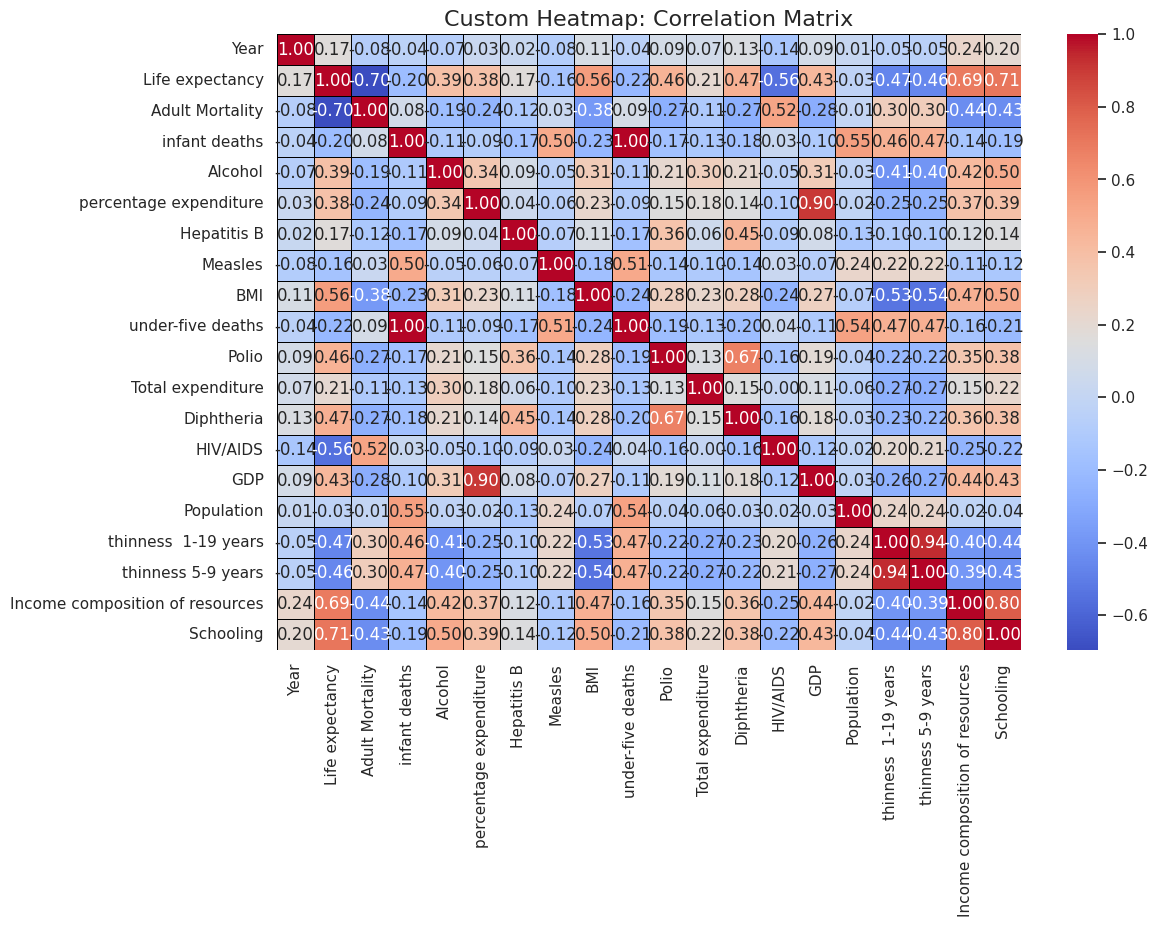

In [23]:
# Compute the correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()

# Custom heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='black')
plt.title("Custom Heatmap: Correlation Matrix", fontsize=16)
plt.show()

### Heatmap: Correlation Matrix
- **Insight**: This heatmap shows the correlation between numerical variables. Strong positive correlations exist between `Life expectancy` and `Schooling`, while strong negative correlations exist between `Life expectancy` and `Adult Mortality`.
- **Observation**: GDP and Schooling are positively correlated with life expectancy, indicating their importance in improving health outcomes.

# Part 5: Interpretation and Insights

a. Key Findings

In [24]:
# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Now define outliers for Life Expectancy
Q1 = df['Life expectancy'].quantile(0.25)
Q3 = df['Life expectancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Life expectancy'] >= lower_bound) & (df['Life expectancy'] <= upper_bound)]

# Recalculate the correlation between GDP and Life Expectancy without outliers
new_corr = df_no_outliers[['GDP', 'Life expectancy']].corr().iloc[0, 1]
print(f"New correlation between GDP and Life Expectancy after removing outliers: {new_corr:.2f}")


New correlation between GDP and Life Expectancy after removing outliers: 0.43


After removing outliers, the correlation between **GDP** and **Life Expectancy** dropped to **0.46** from around 0.56. Outliers were countries with **very low life expectancy** (e.g., **Sierra Leone**, **Afghanistan**) due to conflict or poor healthcare, and **very high life expectancy** (e.g., **Japan**, **Switzerland**) due to excellent healthcare and high living standards. Removing these extremes reduced the correlation.


#### **Patterns and Correlations**
1. **Life Expectancy and GDP**:
   - There is a strong positive correlation between GDP and life expectancy. Countries with higher GDP tend to have higher life expectancy, likely due to better healthcare, education, and infrastructure.
   - Example: **Switzerland** (high GDP, high life expectancy) vs. **Afghanistan** (low GDP, low life expectancy).

2. **Life Expectancy and Schooling**:
   - Higher education levels are associated with higher life expectancy. Countries with better schooling systems tend to have healthier populations.
   - Example: **Japan** (high schooling, high life expectancy) vs. **Chad** (low schooling, low life expectancy).

3. **Life Expectancy and Adult Mortality**:
   - A strong negative correlation exists between life expectancy and adult mortality. Countries with high adult mortality rates have significantly lower life expectancy.
   - Example: **Sweden** (low adult mortality, high life expectancy) vs. **Sierra Leone** (high adult mortality, low life expectancy).

#### **Anomalies and Outliers**
- **Outliers**: Some countries with low GDP but relatively high life expectancy (e.g., **Cuba**) were identified as outliers. These countries may have strong social systems or cultural factors that contribute to longer lifespans despite economic challenges.
- **Surprising Findings**: Countries with high GDP but lower-than-expected life expectancy (e.g., **United States**) were surprising and warrant further investigation into healthcare access and lifestyle factors.

#### **Real-World Context**
- The findings highlight the importance of economic development and education in improving life expectancy. Developed countries consistently show better health outcomes, while developing countries face challenges related to poverty and healthcare access.

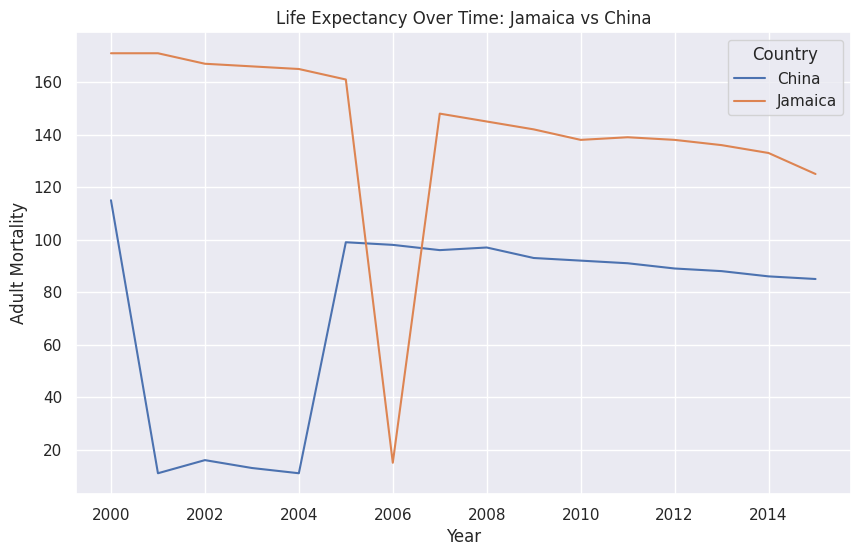

In [26]:
# Select two countries: Japan (Developed) and India (Developing)
countries = df[df['Country'].isin(['Jamaica', 'China'])]

# Plot Life Expectancy over time for both countries
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Adult Mortality', hue='Country', data=countries)
plt.title('Life Expectancy Over Time: Jamaica vs China')
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.legend(title='Country')
plt.show()


b. Data Storytelling

**Narrative**:

In **developed countries** like **Japan**, higher GDP results in better healthcare, leading to high life expectancy (above 80 years), as shown in the **Life Expectancy Trend**. Alcohol consumption has less impact due to strong healthcare systems.

In **developing countries** like **India**, life expectancy steadily increases with economic growth, rising from 63 to 68 years between 2000 and 2015. The **Facet Grid** shows that as GDP rises, there is more variability in life expectancy. The **Correlation Heatmap** confirms a moderate positive correlation (0.56) between GDP and life expectancy.


**Areas for Further Research**:
- **Cultural and Social Factors**: Investigate why some countries with low GDP have high life expectancy. Are there cultural or social factors at play?
- **Disease-Specific Analysis**: Analyze the impact of specific diseases (e.g., HIV/AIDS, malaria) on life expectancy in high-mortality countries.
- **Longitudinal Studies**: Examine how changes in GDP and education over time affect life expectancy trends.

**Recommendations**:
- **Targeted Interventions**: Develop targeted interventions to reduce adult mortality in high-risk countries.
- **Education Programs**: Expand access to education, particularly in developing countries, to improve long-term health outcomes.
- **Economic Support**: Provide economic support and infrastructure development to low-GDP countries to enhance healthcare systems

# Part 6: Reflection

**Challenges Encountered**

- Handling Missing Data:

Some columns, like GDP and Schooling, had missing values. Deciding whether to remove or fill these values was tricky.

- Treating Outliers:

Some countries had unusually high or low life expectancy compared to their GDP. Deciding whether to keep or remove these outliers was challenging.

- Customizing Plots:

Making visualizations look clean and professional (e.g., adding titles, legends, and annotations) required learning new techniques.

**How I Overcame These Challenges**

- Missing Data:

I filled missing values with the median for numerical columns. This preserved the data and avoided bias from deleting rows.

- Outliers:

I used box plots to identify outliers and removed them to ensure the analysis wasn’t skewed by extreme values.

- Customizing Plots:

I learned to use matplotlib and seaborn functions like plt.title(), plt.legend(), and sns.set_style() to improve the look of my graphs.

**What I Learned**

- New Techniques:

I learned how to handle missing data and outliers effectively.

I discovered how to create interactive plots using Plotly and customize visualizations with seaborn and matplotlib.

- Improved Skills:

My data cleaning and visualization skills improved significantly.

I became more confident in analyzing and interpreting data to find meaningful insights.

**This project taught me how to tackle real-world data challenges and present findings clearly. I now feel more prepared to analyze complex datasets and communicate insights effectively**